<a href="https://colab.research.google.com/github/farhananwari07/ProjectML_145-157/blob/main/CNN_Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library


In [ ]:
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%cd /content/drive/MyDrive/Praktikum Kelompok_1/datagen

/content/drive/MyDrive/Praktikum Kelompok_1/datagen


# Main

In [ ]:
x_train = np.load("Copy of xtrain64.npy")
x_test = np.load("Copy of xval64.npy")
y_train = np.load("Copy of ytrain64.npy")
y_test = np.load("Copy of yval64.npy")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalMaxPool2D, AveragePooling2D, GlobalAveragePooling2D,BatchNormalization, Activation

In [ ]:
'''
img_rows,img_cols=120,120
model = Sequential([Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', 
                    input_shape=(img_rows,img_cols,1)),
                    MaxPool2D(pool_size=(2,2)),
                    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
                    BatchNormalization(momentum=0.8),
                    MaxPool2D(pool_size=(2,2)),
                    Dropout(rate=0.25),
                    Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'),
                    BatchNormalization(momentum=0.8),
                    MaxPool2D(pool_size=(2,2)),
                    Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu'),
                    BatchNormalization(momentum=0.8),
                    MaxPool2D(pool_size=(2,2)),
                    Dropout(rate=0.25),
                    GlobalMaxPool2D(),
                    Flatten(),
                    Dropout(rate=0.5),
                    Dense(units=512, activation='relu'),
                    Dense(units=1, activation='softmax')])
'''

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[120,120,1]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(rate=0.25))

model.add(GlobalMaxPool2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
del model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 16)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train,y_train, batch_size=32, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
19/19 [==============================] - 94s 5s/step - loss: 0.9367 - acc: 0.5084 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 2/100
19/19 [==============================] - 90s 5s/step - loss: 0.7904 - acc: 0.4866 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 3/100
19/19 [==============================] - 90s 5s/step - loss: 0.7154 - acc: 0.5134 - val_loss: 0.6939 - val_acc: 0.5000
Epoch 4/100
19/19 [==============================] - 90s 5s/step - loss: 0.7437 - acc: 0.4732 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 5/100
19/19 [==============================] - 90s 5s/step - loss: 0.7010 - acc: 0.5403 - val_loss: 0.6941 - val_acc: 0.5000
Epoch 6/100
19/19 [==============================] - 90s 5s/step - loss: 0.7256 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 7/100
19/19 [==============================] - 90s 5s/step - loss: 0.7164 - acc: 0.5235 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/100
19/19 [==============================] - 90s 5s/step - loss: 0.7209 - a

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


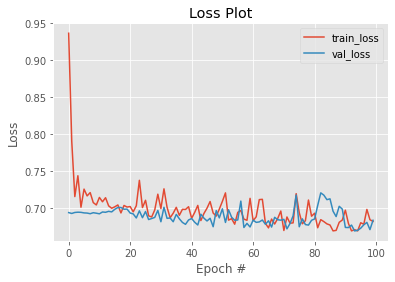

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

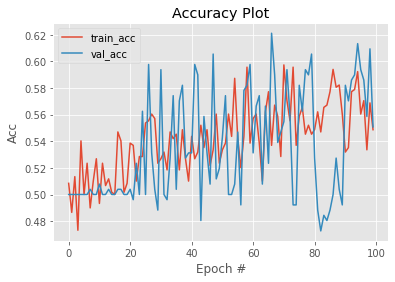

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

         0.0       0.49      0.94      0.65        81
         1.0       0.38      0.04      0.07        81

    accuracy                           0.49       162
   macro avg       0.43      0.49      0.36       162
weighted avg       0.43      0.49      0.36       162



In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk
